In [150]:
import pandas as pd

In [151]:
amazon = pd.read_csv(r"amazon_cells_labelled.txt", delimiter= "\t", header=None, names=["text","class"])

In [152]:
amazon.head()

,text,class
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [153]:
amazon["class"].value_counts()

class
0    500
1    500
Name: count, dtype: int64

In [154]:
imdb = pd.read_csv("imdb_labelled.txt", delimiter="\t", header=None,names=["text","class"])

In [155]:
imdb["class"].value_counts()

class
1    386
0    362
Name: count, dtype: int64

In [156]:
imdb.head()

,text,class
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [157]:
yelp = pd.read_csv("yelp_labelled.txt", delimiter="\t", header=None,names=["text","class"])

In [158]:
yelp["class"].value_counts()

class
1    500
0    500
Name: count, dtype: int64

In [159]:
yelp.head()

,text,class
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [160]:
data= pd.concat([amazon, yelp,imdb]).sample(frac=1, random_state=2024).reset_index(drop="True")

In [161]:
data

,text,class
0,About ten minutes into this film I started hav...,0
1,People couldnt hear me talk and I had to pull ...,0
2,"Very, very sad.",0
3,"Muddy, low quality sound, and the casing aroun...",0
4,"Poor service, the waiter made me feel like I w...",0
...,...,...
2743,This is one of Peter Watkins most accessible f...,1
2744,Waited and waited and waited.,0
2745,"I loved it, it was really scary.",1
2746,The story is also both funny and poignant at t...,1


In [162]:
# !pip install nltk

In [163]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iwowa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iwowa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [164]:
import nltk
import re

stop_words = nltk.corpus.stopwords.words('english')

In [165]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [166]:
allow = ['not','no',"shouldn't", 'against', 'nor',"don't","hasn't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn',"wouldn't"]

In [167]:
stop_words2 = list(set(stop_words)- set(allow))

In [168]:
all_pos_text  = data[data["class"]==1]["text"].to_list()
all_pos_text = " ".join(all_pos_text)

In [169]:
!pip install wordcloud

You should consider upgrading via the 'C:\Users\iwowa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


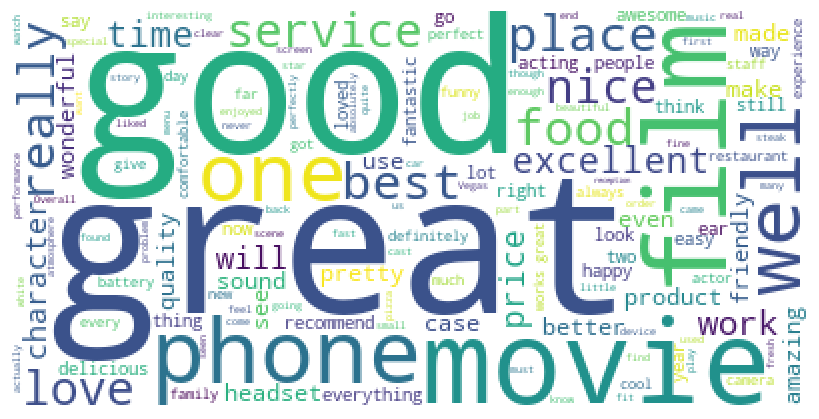

In [170]:

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate_from_text(all_pos_text)
import matplotlib.pyplot as plt
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad =0)
plt.show()

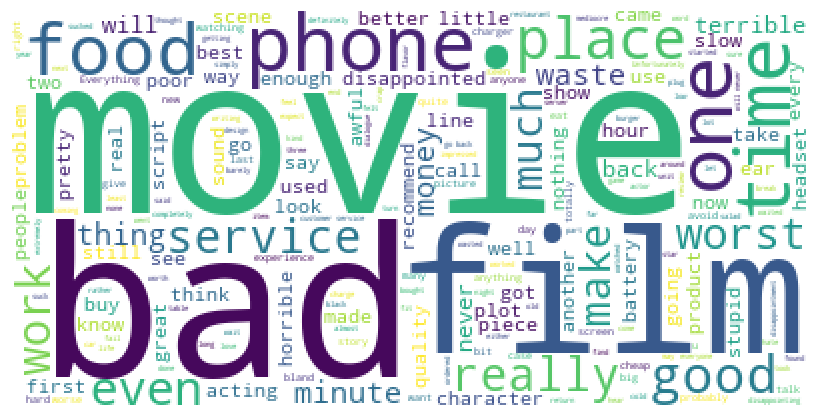

In [171]:
all_neg_text  = data[data["class"]==0]["text"].to_list()
all_neg_text = " ".join(all_neg_text)


from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate_from_text(all_neg_text)
import matplotlib.pyplot as plt
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad =0)
plt.show()

In [172]:
!pip install contractions

You should consider upgrading via the 'C:\Users\iwowa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [173]:
import contractions

In [174]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
stemmer.stem("lying")

lm = WordNetLemmatizer()

lm.lemmatize("unconditional")

'lie'

In [175]:
contractions.fix(" he didn't go there")

' he did not go there'

In [176]:
import re
def normalize_document(doc):
    doc = re.sub(r'[^a-zA-Z\s]', "", doc, re.I|re.A)     #cleaning data to contain only numbers and upperand lower  case letters
    doc = doc.lower()
    doc = doc.strip()
    doc = contractions.fix(doc)
    words = [stemmer.stem(i) for i in doc.split()]
    words = [i for i in words if i not in stop_words2]
    doc = " ".join(words)

    return doc


In [177]:
normalize_document('#O.G x1x23 is here again for more gisting!!')

'og xx gist'

In [178]:
import numpy as np
# verctorizer = np.vectorize(normalize_document)      #alterntaive method
# norm_corp = verctorizer(data.text)


data["clean_text"] = data.text.apply(normalize_document)

In [179]:
#norm_corps

In [180]:
data

,text,class,clean_text
0,About ten minutes into this film I started hav...,0,ten minut thi film start second thought
1,People couldnt hear me talk and I had to pull ...,0,peopl could not hear talk pull earphon talk phone
2,"Very, very sad.",0,veri veri sad
3,"Muddy, low quality sound, and the casing aroun...",0,muddi low qualiti sound case around wire inser...
4,"Poor service, the waiter made me feel like I w...",0,poor servic waiter made feel like wa stupid ev...
...,...,...,...
2743,This is one of Peter Watkins most accessible f...,1,thi one peter watkin access film
2744,Waited and waited and waited.,0,wait wait wait
2745,"I loved it, it was really scary.",1,love wa realli scari
2746,The story is also both funny and poignant at t...,1,stori also funni poignant time


In [181]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [182]:
cv = CountVectorizer()
# tv = TfidfVectorizer
cv_m = cv.fit_transform(data["clean_text"])
# tv_m = tv.fit_transform(data["clean_text"])

In [183]:
cv.get_feature_names_out()

array(['10', '25', 'aailiyah', ..., 'zombi', 'zombiestud', 'zombiez'],
      dtype=object)

In [184]:
x =pd.DataFrame(cv_m.toarray(), columns=cv.get_feature_names_out())

In [185]:
y = data["class"]

In [186]:
x.head()

,10,25,aailiyah,abandon,abhor,abil,abl,abound,abov,abovepretti,...,yukon,yum,yummi,yun,za,zero,zillion,zombi,zombiestud,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2024, stratify=y)

In [188]:
y.value_counts()

class
1    1386
0    1362
Name: count, dtype: int64

In [189]:
from sklearn.linear_model import LogisticRegression

In [190]:
lr= LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [191]:
y_pred = lr.predict(x_test)
y_pred[:10]

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [192]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [193]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       281
           1       0.80      0.82      0.81       269

    accuracy                           0.81       550
   macro avg       0.81      0.81      0.81       550
weighted avg       0.81      0.81      0.81       550



In [194]:
pd.DataFrame(confusion_matrix(y_pred,y_test))

,0,1
0,225,56
1,48,221


In [195]:
print(accuracy_score(y_pred,y_test))

0.8109090909090909


In [196]:
import warnings
warnings.filterwarnings('ignore')

In [197]:
saurav_reviewr = "This movie was extremely horrible. I have never ever seen a movie that bad"
print(saurav_reviewr)

This movie was extremely horrible. I have never ever seen a movie that bad


In [198]:
classes = ["Negative", "Positive"]
def classify_rev(comments_made):
    srt = cv.transform([comments_made])
    a= int(lr.predict(srt.toarray()))
    print(f"The review is {classes[a]}")
    print(f"The movie is {lr.predict_proba(srt.toarray())}")

In [199]:
classify_rev(saurav_reviewr)

The review is Negative
The movie is [[0.99227183 0.00772817]]


In [200]:
igb_comment = "This movie is great. I love it very much "
classify_rev(igb_comment)

The review is Positive
The movie is [[0.00607956 0.99392044]]


In [216]:
sent1= "The movie was great! They I had fun at the cinema watching Dracula"
sent2= "I went to the cinema to watch a movie"
sent3= "Tunde onakanya is a freaking legend! man"
sent4 = "IGB is going to watch a movie. he will love it."

In [217]:
v1= cv.transform([sent1]).toarray()
v2= cv.transform([sent2]).toarray()
v3= cv.transform([sent3]).toarray()
v4= cv.transform([sent4]).toarray()


In [220]:
df = pd.DataFrame(v1[0], columns=["vector1"])
df["vector2"] = pd.DataFrame(v2[0])
df["vector3"] = pd.DataFrame(v3[0])
df["vector_sum"] = df["vector1"] + df["vector2"] + df["vector3"]
df["names"] = cv.get_feature_names_out()
df[df["vector_sum"]!=0]

,vector1,vector2,vector3,vector_sum,names
639,1,1,0,2,cinema
1035,1,0,0,1,dracula
1453,1,0,0,1,fun
1555,1,0,0,1,great
2131,0,0,1,1,man
3915,0,1,0,1,watch
3949,0,1,0,1,went


In [210]:
from sklearn.metrics.pairwise import cosine_similarity

In [211]:
cosine_similarity(v1,v3)

array([[0.]])

In [212]:
cosine_similarity(v1,v2)


array([[0.28867513]])

In [213]:
cosine_similarity(v2,v3)


array([[0.]])

In [219]:
cosine_similarity(v1,v4)

array([[0.]])

In [218]:
cosine_similarity(v2,v4)


array([[0.40824829]])

# POS TAGGING

In [229]:
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\iwowa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\iwowa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


True

In [230]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
pos_tag(word_tokenize("Blessing is just very stubborn but intelligent anyway."),tagset='universal')



[('Blessing', 'NOUN'),
 ('is', 'VERB'),
 ('just', 'ADV'),
 ('very', 'ADV'),
 ('stubborn', 'ADJ'),
 ('but', 'CONJ'),
 ('intelligent', 'ADJ'),
 ('anyway', 'ADV'),
 ('.', '.')]

In [226]:
pos_tag??

Signature: pos_tag(tokens, tagset=None, lang='eng')
Source:   
def pos_tag(tokens, tagset=None, lang="eng"):
    """
    Use NLTK's currently recommended part of speech tagger to
    tag the given list of tokens.

        >>> from nltk.tag import pos_tag
        >>> from nltk.tokenize import word_tokenize
        >>> pos_tag(word_tokenize("John's big idea isn't all that bad.")) # doctest: +NORMALIZE_WHITESPACE
        [('John', 'NNP'), ("'s", 'POS'), ('big', 'JJ'), ('idea', 'NN'), ('is', 'VBZ'),
        ("n't", 'RB'), ('all', 'PDT'), ('that', 'DT'), ('bad', 'JJ'), ('.', '.')]
        >>> pos_tag(word_tokenize("John's big idea isn't all that bad."), tagset='universal') # doctest: +NORMALIZE_WHITESPACE
        [('John', 'NOUN'), ("'s", 'PRT'), ('big', 'ADJ'), ('idea', 'NOUN'), ('is', 'VERB'),
        ("n't", 'ADV'), ('all', 'DET'), ('that', 'DET'), ('bad', 'ADJ'), ('.', '.')]

    NB. Use `pos_tag_sents()` for efficient tagging of more than one sentence.

    :param tokens: Sequence of t

In [232]:
import fasttext

In [233]:
all_text = data["text"].to_list()
all_text = " ".join(all_text)

In [234]:
with open('train.txt' , 'w' , encoding='utf-8') as f:
    f.write(all_text)
ft = fasttext.train_supervised('train.txt')


In [235]:
fv1 = ft.get_sentence_vector(sent1)
fv2 = ft.get_sentence_vector(sent2)


In [236]:
cosine_similarity([fv1],[fv2])

array([[0.39817822]], dtype=float32)